Student name: Madina Kudaibergenova; ID: 201490750

Stock Price prediction written in Python using machine learning algorithm called Support Vector Regression(SVR). I will use historical data of given 10 companies and make prediction for the 15th of March 2021.

First of all, I want to make acknowledgment to the author of an educational tutorial (link: https://randerson112358.medium.com/google-stock-prediction-using-python-machine-learning-8a21efc6b340) for providing me a simple and understandable code.

SVR is a type of Support Vector Machine (SVM), and it is a supervised learning algorithm that analyzes data for regression analysis. The SVR model depends only on a subset of the training data because the cost function for building the model ignores any training data close to the model prediction.

The advantages of SVM: 


*   effectiveness in high dimensional spaces;
*   working well with clear margin separation;
*   effectiveness even when the number of dimensions is greater than the number of samples.

The disadvantages:


*   bad performance if the data set is large (in my case it worked good only for dataset of 10-20 prices)
*   low performance if dataset is noisy (a lot of unnecessary information)







Types of kernels: linear, polynomial. radial basis function(rbf) and sigmoid.





In [1]:
# importing the libraries
from sklearn.svm import SVR 
import numpy as np #to work with arrays and matrices
import pandas as pd #to work with files
import matplotlib.pyplot as plt #to visually represent data
plt.style.use('seaborn-darkgrid')

**XOM company**

In [2]:
# please change the source of the file if necessary
df = pd.read_csv('/content/sample_data/XOM.csv') #reading data and store in dataframe
df #how it looks like

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/03/21,56.470001,57.610001,56.130001,56.400002,56.400002,36973400
1,02/03/21,56.650002,56.959999,56.020000,56.070000,56.070000,30281900
2,03/03/21,56.419998,57.959999,55.880001,56.520000,56.520000,35335900
3,04/03/21,57.119999,59.470001,57.099998,58.709999,58.709999,51928500
4,05/03/21,59.830002,61.049999,59.110001,60.930000,60.930000,51397800
5,08/03/21,61.580002,61.610001,59.820000,60.869999,60.869999,38142300
6,09/03/21,60.610001,61.389999,59.470001,59.930000,59.930000,35605200
7,10/03/21,60.520000,61.919998,60.029999,61.770000,61.770000,31551900
8,11/03/21,61.779999,62.549999,61.259998,61.310001,61.310001,24772800
9,12/03/21,61.549999,62.369999,61.500000,61.970001,61.970001,20414700


In [3]:
# the most recent closing price
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
9,12/03/21,61.549999,62.369999,61.5,61.970001,61.970001,20414700


In [4]:
# preparing data for training: all data except the last row
# last value will be used to test the model
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/03/21,56.470001,57.610001,56.130001,56.400002,56.400002,36973400
1,02/03/21,56.650002,56.959999,56.020000,56.070000,56.070000,30281900
2,03/03/21,56.419998,57.959999,55.880001,56.520000,56.520000,35335900
3,04/03/21,57.119999,59.470001,57.099998,58.709999,58.709999,51928500
4,05/03/21,59.830002,61.049999,59.110001,60.930000,60.930000,51397800
5,08/03/21,61.580002,61.610001,59.820000,60.869999,60.869999,38142300
6,09/03/21,60.610001,61.389999,59.470001,59.930000,59.930000,35605200
7,10/03/21,60.520000,61.919998,60.029999,61.770000,61.770000,31551900
8,11/03/21,61.779999,62.549999,61.259998,61.310001,61.310001,24772800


In [5]:
# creating variables for independent ans dependent data sets (as lists)
days = list()
adj_close_prices = list()

In [6]:
# getting all values for dates and adj close prices, and store them in related variables
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [7]:
# create the independent dataset(only days)
for day in df_days:
    days.append([int(day.split('/')[0])])
    
#create dependent dataset (only adj close prices)
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

In [8]:
print(days)

[[1], [2], [3], [4], [5], [8], [9], [10], [11]]


In [9]:
print(adj_close_prices)

[56.400002, 56.07, 56.52, 58.709998999999996, 60.93, 60.869999, 59.93, 61.77, 61.310001]


In [10]:
# create and train an SVR model using linear kernel 
lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)

# create and train an SVR model using polynomial kernel 
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)

# create and train an SVR model using rbf kernel 
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

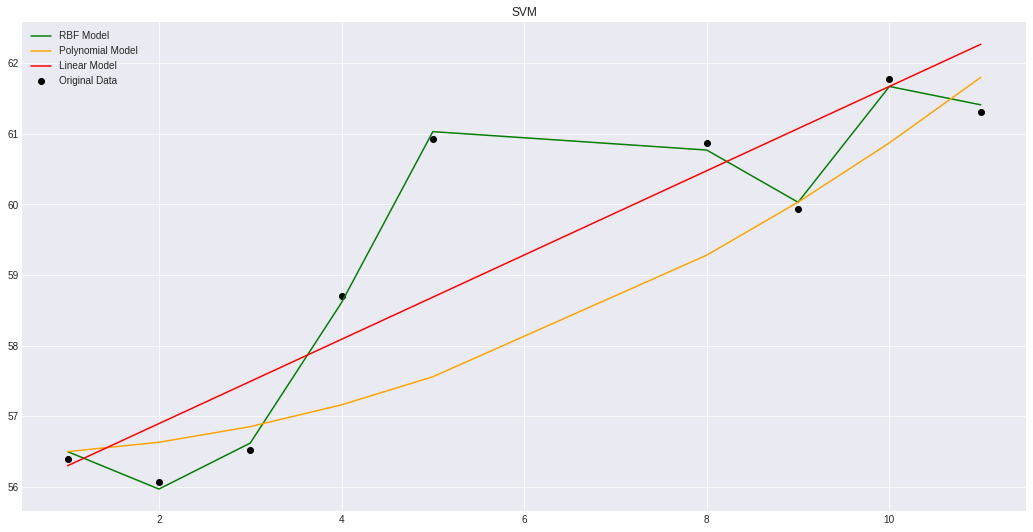

In [11]:
# plotting the models on a graph to analyze the best fitting model
plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

According to the graph the best model is RBF. However, the graph can be misleading due to a few amount of data and other factors (economics, financial events, and etc)

In [12]:
# makeing a stock price prediction
# the last row of data was 12th of March 
day = [[12]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The RBF SVR predicted:  [58.02079497]
The Linear SVR predicted:  [62.86333289]
The Polynomial SVR predicted:  [62.81360807]


As we can see from the original table the real close price on 12th of March was 61.970001$; however, according to values of the model the differences are:


*   rbf: 61.970001 - 58.02079497 = approximately 3.95$;

*   linear: 0.89$;

*   polynomial: 0.84$;

Therefore, linear and polynomial fitted the best.




Now I will predict the price for 15th of March, and including thee 12th day.

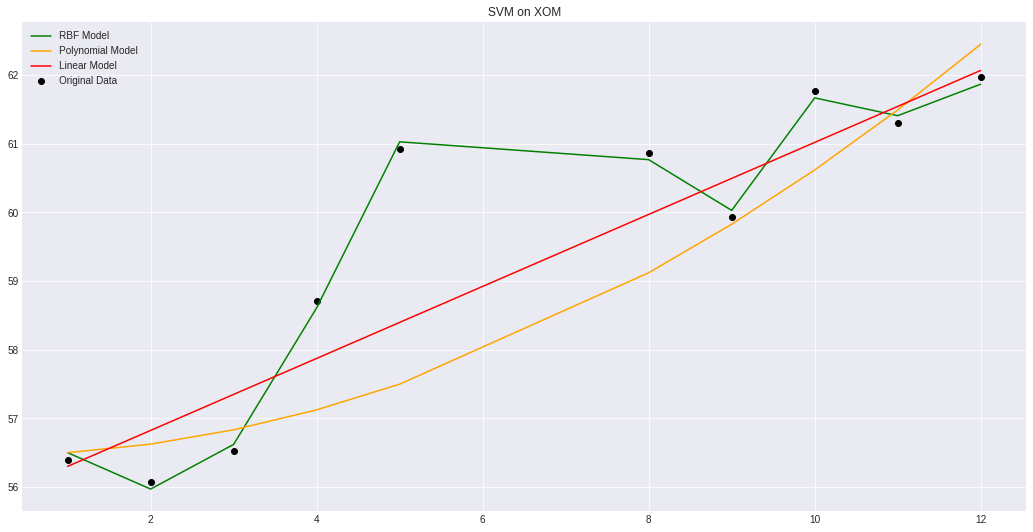

In [14]:
df = pd.read_csv('/content/sample_data/XOM.csv')
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM on XOM')
plt.legend()
plt.show()

In [15]:
day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The RBF SVR predicted:  [67.69079504]
The Linear SVR predicted:  [63.64363709]
The Polynomial SVR predicted:  [65.82115562]


So for the day 15th of March I will use linear (it is my choice) due to its lowest difference (from the previous training).

My answer is **63.64363709$**



---



**GS company**

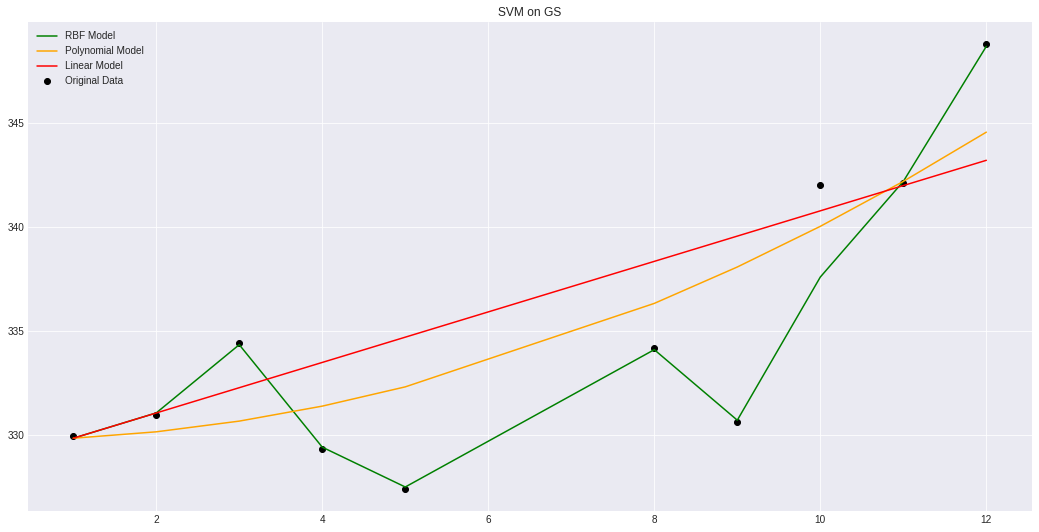

In [18]:
df = pd.read_csv('/content/sample_data/GS.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM on GS')
plt.legend()
plt.show()

In [19]:
day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The RBF SVR predicted:  [363.67628791]
The Linear SVR predicted:  [346.8720032]
The Polynomial SVR predicted:  [352.93215066]


The closing price for GS company, based on my prediction, will be **352.93215066$**



---



**BHP company**

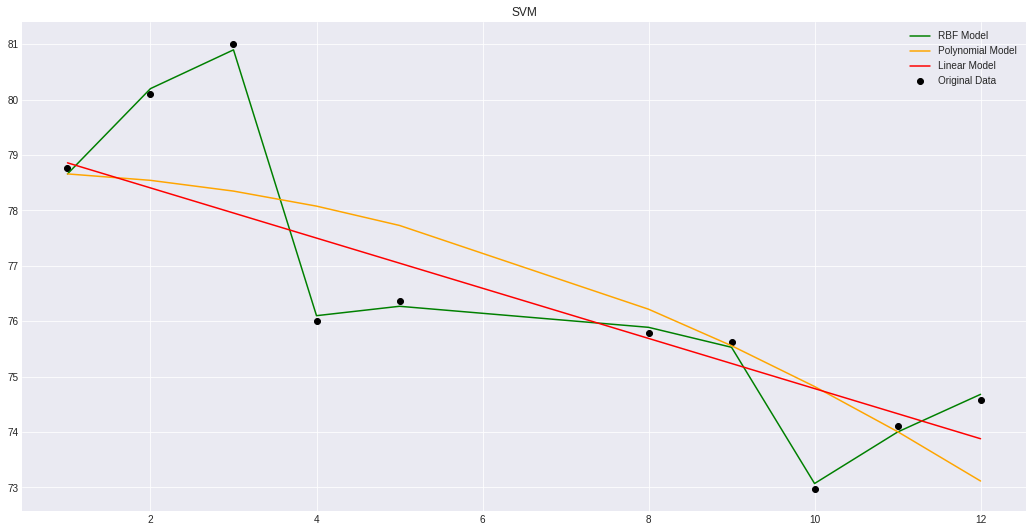

The RBF SVR predicted:  [65.81680136]
The Linear SVR predicted:  [72.52]
The Polynomial SVR predicted:  [69.97447252]


In [20]:
df = pd.read_csv('/content/sample_data/BHP.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The predictied closing price for BHP company will be **72.52$**



---



**DE company**

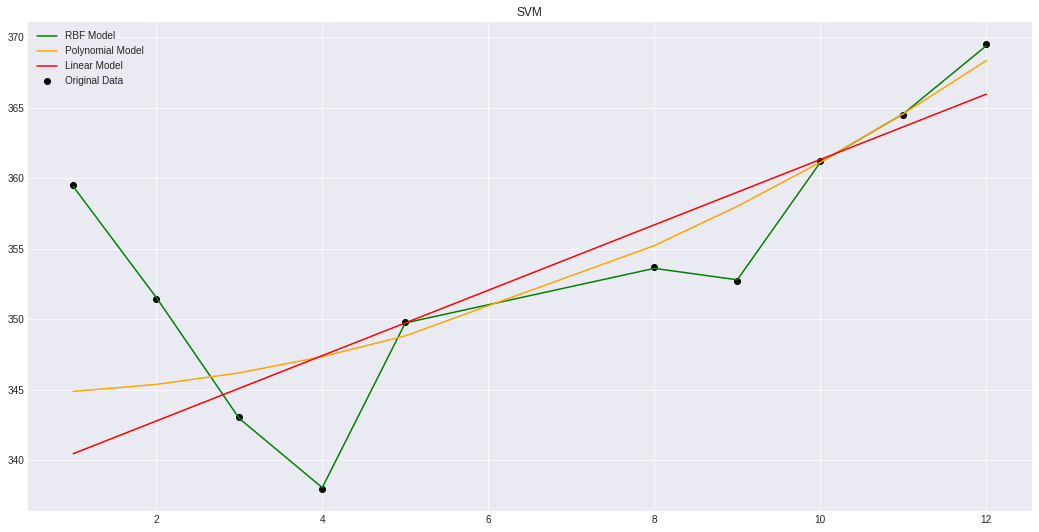

The RBF SVR predicted:  [381.20569995]
The Linear SVR predicted:  [372.910015]
The Polynomial SVR predicted:  [381.62241694]


In [21]:
df = pd.read_csv('/content/sample_data/DE.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

Answer for DE is: **372.910015$**



---



**FE company**

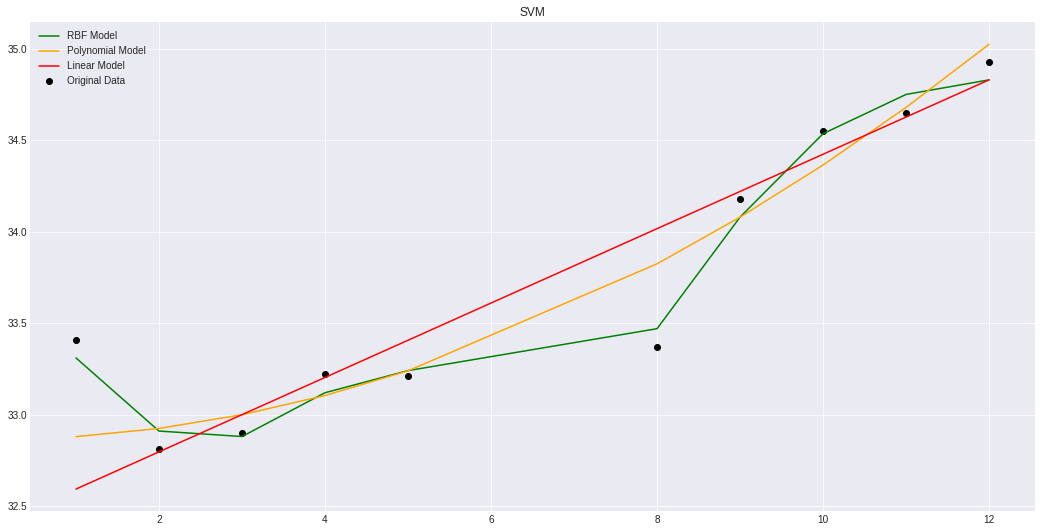

The RBF SVR predicted:  [34.16522114]
The Linear SVR predicted:  [35.43999933]
The Polynomial SVR predicted:  [36.23905819]


In [23]:
df = pd.read_csv('/content/sample_data/FE.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

Closing price for FE company: **35.43999933$**



---



**GOOG company**

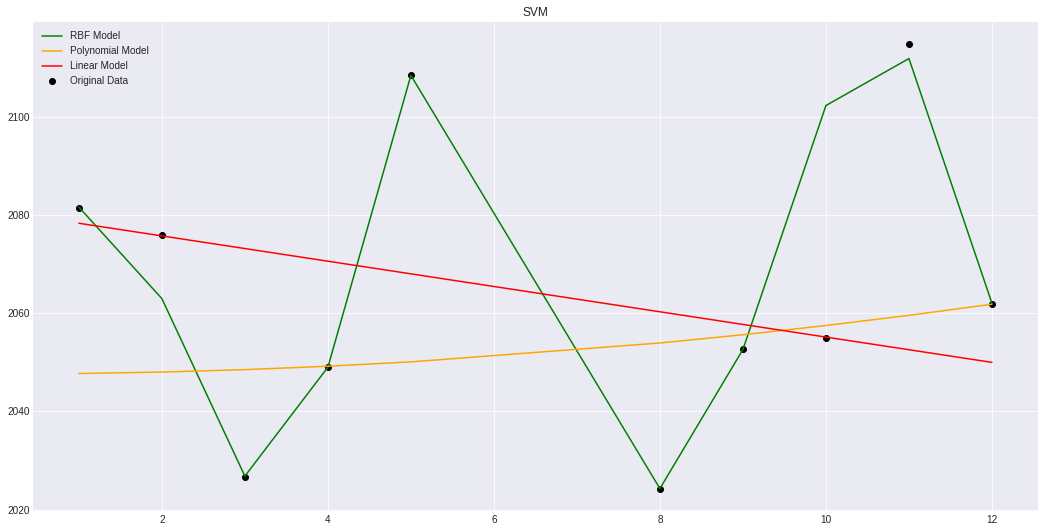

The RBF SVR predicted:  [1997.98190351]
The Linear SVR predicted:  [2042.24874213]
The Polynomial SVR predicted:  [2069.82584861]


In [24]:
df = pd.read_csv('/content/sample_data/GOOG.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The closing price I hope will be: **2042.24874213$**



---



**T company**

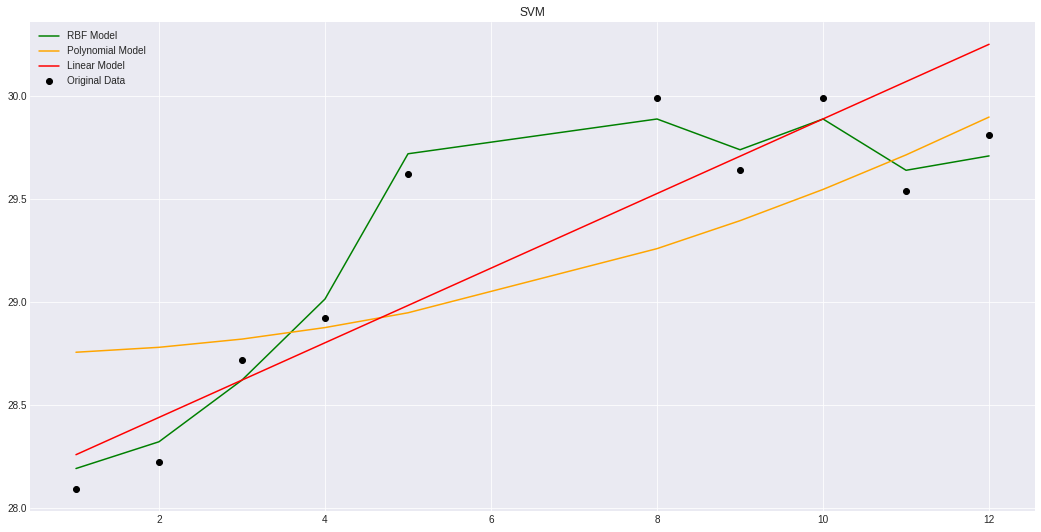

The RBF SVR predicted:  [30.88722746]
The Linear SVR predicted:  [30.79714357]
The Polynomial SVR predicted:  [30.54686271]


In [25]:
df = pd.read_csv('/content/sample_data/T.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

My answer for T is: **30.54686271$**



---



**WMT company**

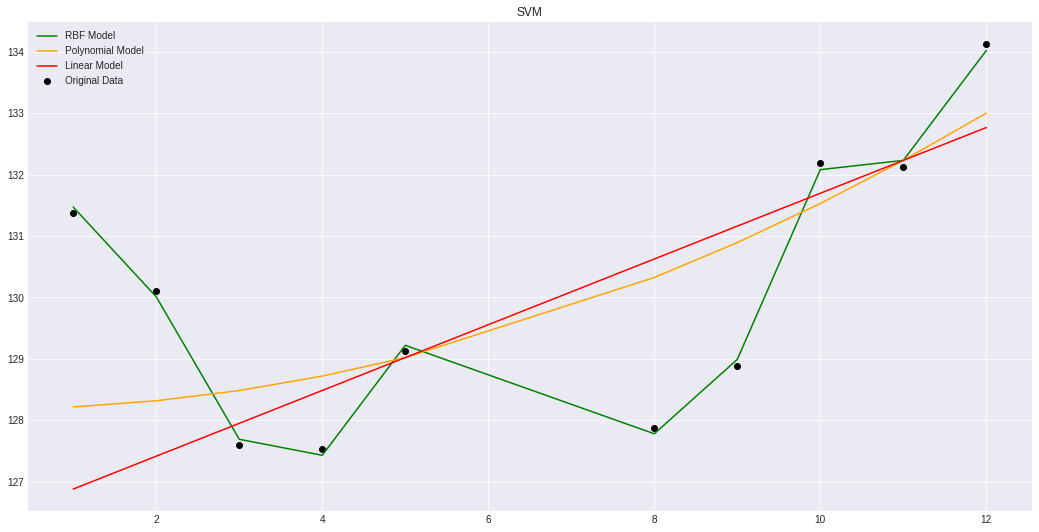

The RBF SVR predicted:  [141.66036554]
The Linear SVR predicted:  [134.37001167]
The Polynomial SVR predicted:  [135.70862534]


In [26]:
df = pd.read_csv('/content/sample_data/WMT.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

My answer for WMT is: **134.37001167$**



---



**KO company**

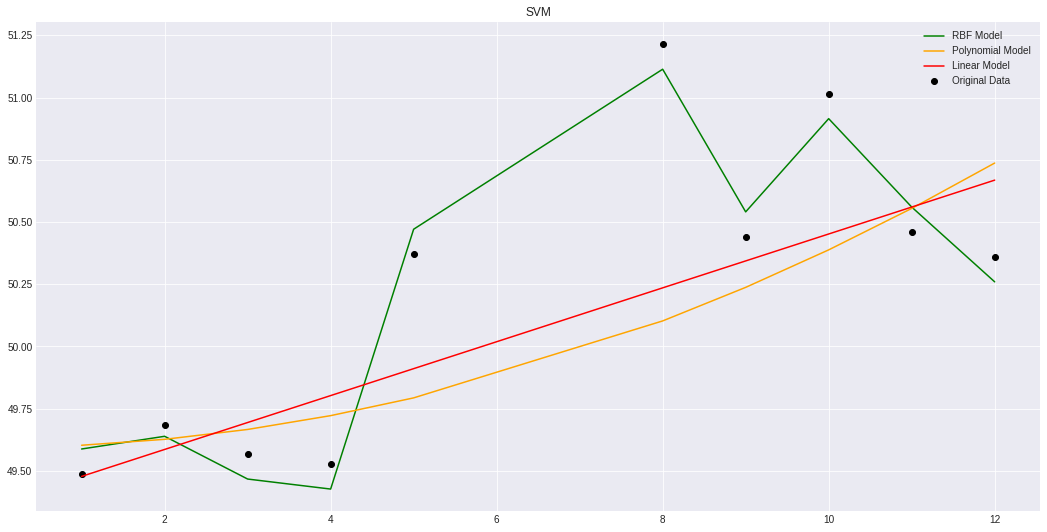

The RBF SVR predicted:  [52.26933753]
The Linear SVR predicted:  [50.99269767]
The Polynomial SVR predicted:  [51.37883046]


In [28]:
df = pd.read_csv('/content/sample_data/KO.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

The answer for KO is: **50.99269767$**



---



**JNJ company**

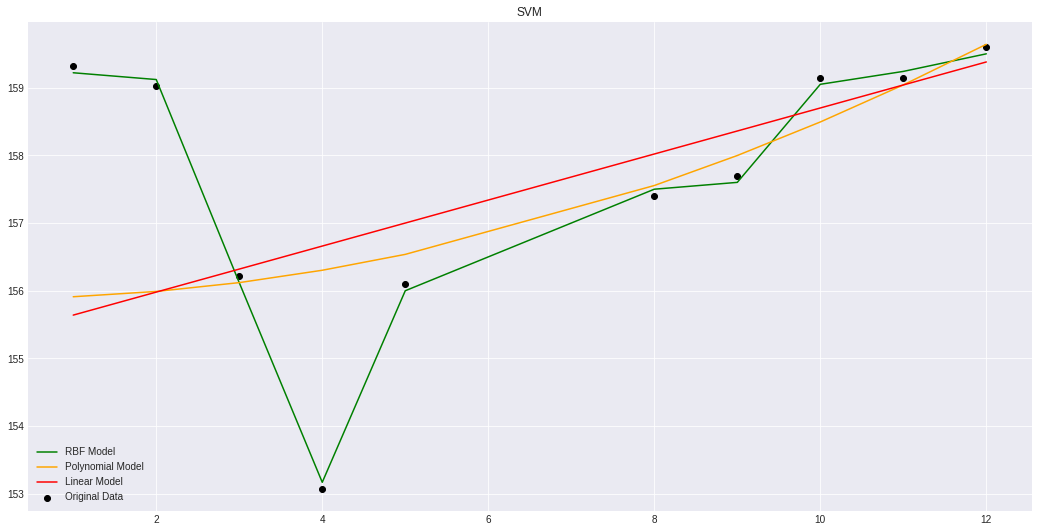

The RBF SVR predicted:  [160.74595462]
The Linear SVR predicted:  [160.399998]
The Polynomial SVR predicted:  [161.75335192]


In [29]:
df = pd.read_csv('/content/sample_data/JNJ.csv')
actual_price = df.tail(1)
days = list()
adj_close_prices = list()
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']
for day in df_days:
    days.append([int(day.split('/')[0])])
  
for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))

lin_svr = SVR(kernel='linear', C=1e3)
lin_svr.fit(days,adj_close_prices)
poly_svr = SVR(kernel='poly', C=1e3, degree=2)
poly_svr.fit(days,adj_close_prices)
rbf_svr=SVR(kernel='rbf',C=1e3, gamma=0.15)
rbf_svr.fit(days,adj_close_prices)

plt.figure(figsize=(18,9))
plt.scatter(days,adj_close_prices,color='black', label='Original Data')
plt.plot(days, rbf_svr.predict(days), color='green',label='RBF Model')
plt.plot(days, poly_svr.predict(days), color='orange',label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color='red',label='Linear Model')
plt.xlabel=('Days')
plt.ylabel=('Adj Close Price')
plt.title('SVM')
plt.legend()
plt.show()

day = [[15]]
print('The RBF SVR predicted: ', rbf_svr.predict(day))
print('The Linear SVR predicted: ', lin_svr.predict(day))
print('The Polynomial SVR predicted: ', poly_svr.predict(day))

Here for JNJ I will choose RBF kernel's prediction: **160.74595462$**

Overall, the model presented here is very understandable for everyone who strarted to learn the market trading algorithms. However, it is very risky to make any investment based on this model because prediciton is always challenges and stock prices depend on the number of factors. 

Further work that might be done towards this model is adding more data (if possible, at least the last two month's data) and try to plat with function paramenter (i.e.degree, gamma, C, tol etc).